In [1]:
from langgraph.graph import StateGraph, START, END

Implementation Using BaseModel

In [2]:
# Define the state using BaseModel
from pydantic import BaseModel
class MathState(BaseModel):
    num1: float
    num2: float
    sum_result: float = 0
    final_result: float = 0

In [7]:
# Define node functions
def add_numbers(state: MathState) -> MathState:
    state.sum_result = state.num1 + state.num2
    return state
def multiply_result(state: MathState) -> MathState:
    state.final_result = state.sum_result * 2
    return state

In [ ]:
# Initialize and build the graph
graph = StateGraph(MathState)
graph.add_node("add", add_numbers)
graph.add_node("multiply", multiply_result)
graph.add_edge(START, "add")
graph.add_edge("add", "multiply")
graph.add_edge("multiply", END)

In [10]:
# Compile and execute
app = graph.compile()

In [ ]:
initial_state = MathState(num1=5, num2=3)
final_state = app.invoke(initial_state)

In [ ]:
print(f"Final Result: {final_state}") 

Final Result: {'num1': 5.0, 'num2': 3.0, 'sum_result': 8.0, 'final_result': 16.0}


Implementation Using TypedDict

In [19]:
from typing import TypedDict
class MathState(TypedDict):
    num1: float
    num2: float
    sum_result: float
    final_result: float

In [20]:
# Define node functions
def add_numbers(state: MathState) -> MathState:
    state["sum_result"] = state["num1"] + state["num2"]
    return state
def multiply_result(state: MathState) -> MathState:
    state["final_result"] = state["sum_result"] * 2
    return state

In [ ]:
# Initialize and build the graph
graph = StateGraph(MathState)
graph.add_node("add", add_numbers)
graph.add_node("multiply", multiply_result)
graph.add_edge(START, "add")
graph.add_edge("add", "multiply")
graph.add_edge("multiply", END)

In [ ]:
# Compile and execute
app = graph.compile()
initial_state: MathState = {"num1": 5, "num2": 3, "sum_result": 0, "final_result": 0}
final_state = app.invoke(initial_state)
print(f"Final Result: {final_state['final_result']}")  

Final Result: 16


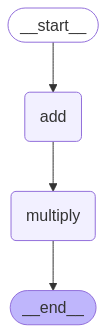

In [24]:
from IPython.display import Image, display


display(Image(app.get_graph().draw_mermaid_png()))
